<a href="https://colab.research.google.com/github/arcarrion/hsespecialization_course02/blob/master/02_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
shivan118/healthcare-analytics                         Healthcare Analytics                                2MB  2020-09-13 17:40:05           1123  
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification        4MB  2020-09-08 11:40:11            662  
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31           1827  
Cornell-University/arxiv                               arXiv Dataset                                     885MB  2020-09-14 16:54:47           2990  
nipunarora8/age-gender-and-ethnicity-face-data-csv     AGE, GENDER AND E

In [2]:
#! kaggle competitions download -h
#! unzip -h

In [3]:
! mkdir rawdata
! kaggle competitions download -c competitive-data-science-predict-future-sales -p rawdata
! unzip 'rawdata/*.zip' -d rawdata
! rm rawdata/*.zip

  0% 0.00/468k [00:00<?, ?B/s]
100% 468k/468k [00:00<00:00, 70.7MB/s]
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 49.7MB/s]
 60% 8.00M/13.3M [00:00<00:00, 77.4MB/s]
100% 13.3M/13.3M [00:00<00:00, 84.7MB/s]
  0% 0.00/1.02M [00:00<?, ?B/s]
100% 1.02M/1.02M [00:00<00:00, 68.1MB/s]
  0% 0.00/3.49k [00:00<?, ?B/s]
100% 3.49k/3.49k [00:00<00:00, 3.61MB/s]
  0% 0.00/2.91k [00:00<?, ?B/s]
100% 2.91k/2.91k [00:00<00:00, 2.86MB/s]
Archive:  rawdata/items.csv.zip
  inflating: rawdata/items.csv       

Archive:  rawdata/sample_submission.csv.zip
  inflating: rawdata/sample_submission.csv  

Archive:  rawdata/test.csv.zip
  inflating: rawdata/test.csv        

Archive:  rawdata/sales_train.csv.zip
  inflating: rawdata/sales_train.csv  

4 archives were successfully processed.


In [4]:
print('################################################################# Item categories')
! head rawdata/item_categories.csv
print('################################################################# items')
! head rawdata/items.csv
print('################################################################# sales train')
! head rawdata/sales_train.csv
print('################################################################# shops')
! head rawdata/shops.csv
print('\n\n################################################################# test')
! head rawdata/test.csv
print('################################################################# sample submission')
! head rawdata/sample_submission.csv

################################################################# Item categories
item_category_name,item_category_id
PC - Гарнитуры/Наушники,0
Аксессуары - PS2,1
Аксессуары - PS3,2
Аксессуары - PS4,3
Аксессуары - PSP,4
Аксессуары - PSVita,5
Аксессуары - XBOX 360,6
Аксессуары - XBOX ONE,7
Билеты (Цифра),8
################################################################# items
item_name,item_id,item_category_id
! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D,0,40
"!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]",1,76
***В ЛУЧАХ СЛАВЫ   (UNV)                    D,2,40
***ГОЛУБАЯ ВОЛНА  (Univ)                      D,3,40
***КОРОБКА (СТЕКЛО)                       D,4,40
***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)             D,5,40
***УДАР ПО ВОРОТАМ (UNI)               D,6,40
***УДАР ПО ВОРОТАМ-2 (UNI)               D,7,40
***ЧАЙ С МУССОЛИНИ                     D,8,40
################################################################# sales train
date,date_block_num,shop_id,item_id

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
def submit_solution(solution_data, message):
  test_data = pd.read_csv('rawdata/test.csv')
  median_sales_test = pd.merge(test_data, solution_data, how='left', on=['shop_id', 'item_id'])
  display(median_sales_test)
  median_sales_test.loc[pd.isnull(median_sales_test.item_cnt_day), 'item_cnt_day'] = 0
  sample_submission = median_sales_test.loc[:, ['ID','item_cnt_day']]
  sample_submission.columns = ['ID', 'item_cnt_month']
  display(sample_submission)
  sample_submission.to_csv('submission_tmp.csv', header=True, index=False)
  ! kaggle competitions submit -c competitive-data-science-predict-future-sales -f submission_tmp.csv -m $message
  ! rm submission_tmp.csv

In [7]:
sales_rawdata = pd.read_csv('rawdata/sales_train.csv')


In [8]:
print(sales_rawdata.head())
print(sales_rawdata.dtypes)

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object


In [9]:
sales_noreturns = sales_rawdata.loc[sales_rawdata.item_cnt_day>=0, :]

In [10]:
sales_noreturns_grouped = sales_noreturns.groupby(['date_block_num','shop_id','item_id']).aggregate({'item_cnt_day':sum}).reset_index()
display(sales_noreturns_grouped)

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1608221,33,59,22087,6.0
1608222,33,59,22088,2.0
1608223,33,59,22091,1.0
1608224,33,59,22100,1.0


In [11]:
# Baseline score: median sales, rounded down
sales_noreturns_grouped_last_6_months = sales_noreturns_grouped.loc[sales_noreturns_grouped.date_block_num>=(34-6), :]
median_sales = sales_noreturns_grouped_last_6_months.groupby(['shop_id','item_id']).aggregate({'item_cnt_day':'median'}).reset_index()
display(median_sales)
median_sales.item_cnt_day = np.floor(median_sales.item_cnt_day)
display(median_sales)
#median_sales = sales_noreturns_grouped.loc[sales_noreturns_grouped.date_block_num==(34-12), :]
#display(median_sales)
submit_solution(median_sales, 'Median last 6 months')

,shop_id,item_id,item_cnt_day
0,2,31,1.0
1,2,32,1.0
2,2,33,1.0
3,2,70,1.0
4,2,464,2.0
...,...,...,...
97959,59,22104,1.0
97960,59,22105,1.0
97961,59,22139,1.0
97962,59,22162,1.0


,shop_id,item_id,item_cnt_day
0,2,31,1.0
1,2,32,1.0
2,2,33,1.0
3,2,70,1.0
4,2,464,2.0
...,...,...,...
97959,59,22104,1.0
97960,59,22105,1.0
97961,59,22139,1.0
97962,59,22162,1.0


,ID,shop_id,item_id,item_cnt_day
0,0,5,5037,1.0
1,1,5,5320,NaN
2,2,5,5233,2.0
3,3,5,5232,1.0
4,4,5,5268,NaN
...,...,...,...,...
214195,214195,45,18454,1.0
214196,214196,45,16188,NaN
214197,214197,45,15757,NaN
214198,214198,45,19648,NaN


,ID,item_cnt_month
0,0,1.0
1,1,0.0
2,2,2.0
3,3,1.0
4,4,0.0
...,...,...
214195,214195,1.0
214196,214196,0.0
214197,214197,0.0
214198,214198,0.0


100% 2.14M/2.14M [00:07<00:00, 285kB/s]
Successfully submitted to Predict Future Sales

# Exploratory Data Analysis

## Sales data

In [12]:
sales_rawdata = pd.read_csv('rawdata/sales_train.csv')

In [13]:
print(sales_rawdata.columns)

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')


In [18]:
print(sales_rawdata.dtypes)

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object


In [14]:
display(sales_rawdata.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


(array([115690., 108613., 121347.,  94109.,  91759., 100403., 100548.,
        104772.,  96137.,  94202.,  96736., 143246.,  99349.,  89830.,
         92733.,  77906.,  78529.,  82408.,  78760.,  86614.,  73157.,
         79361.,  86428., 130786.,  88522.,  71808.,  69977.,  56274.,
         54548.,  54617.,  55549.,  57029., 104102.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33.]),
 <a list of 33 Patch objects>)

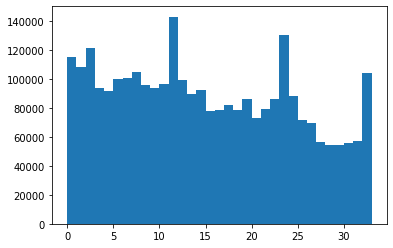

In [16]:
plt.hist(sales_rawdata.date_block_num, bins=max(sales_rawdata.date_block_num))

(array([115338., 108326., 121053.,  93865.,  91582., 100202., 100350.,
        104495.,  95918.,  93938.,  96503., 142921.,  99009.,  89550.,
         92530.,  77718.,  78382.,  82215.,  78554.,  86427.,  72943.,
         79169.,  86225., 130489.,  88199.,  71595.,  69766.,  56157.,
         54415.,  54497.,  55420.,  56913., 103829.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33.]),
 <a list of 33 Patch objects>)

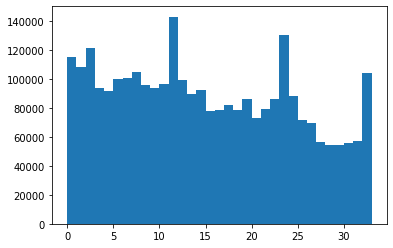

In [19]:
plt.hist(sales_rawdata.loc[sales_rawdata.item_cnt_day>0, 'date_block_num'], bins=max(sales_rawdata.date_block_num))

- It can be observed that the number of sales diminishes with time. There are some high points in months 11 (december), 23 (december), 33 (october!). Maybe the last month is not the best one as reference (baseline prediction). There was a sale? a big promotion?

In [41]:
tmp = sales_rawdata.loc[sales_rawdata.item_cnt_day>0, :].groupby('item_id')['item_price'].count().reset_index()

In [47]:
display(tmp.head(26))

,item_id,item_price
0,0,1
1,1,6
2,2,2
3,3,2
4,4,1
5,5,1
6,6,1
7,7,1
8,8,2
9,9,1


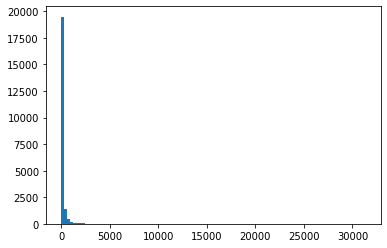

In [48]:
plt.hist(tmp.item_price, bins=100)
plt.show()

This plot shows that most items appear very few times. Let's take a look at log of this

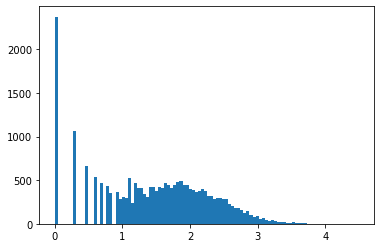

In [49]:
plt.hist(np.log10(tmp.item_price), bins=100)
plt.show()

This gives us a better idea. More than 2000 of the items appears only once in the whole dataset! And around 2000 more below 10 times. So for these items appearing only 1-10 times, it is by similarity with other items that they can be predicted.
In fact, they might mislead the prediction? I think they could be used to calculate averages of sales, of most trendy categories or stores (aggregated calculations) (and not pretty sure about that either), but probably they are tricky to consider as samples for training.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


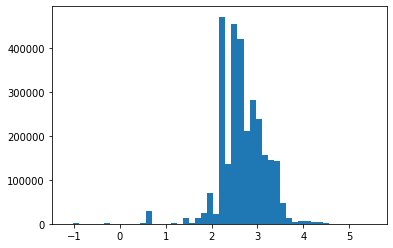

In [53]:
plt.hist(np.log10(sales_rawdata.loc[sales_rawdata.item_cnt_day>0].item_price), bins=50)
plt.show()

In [55]:
display(sales_rawdata.loc[sales_rawdata.item_price<0, :])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


There is an entry with negative price (??). Also, price ranges are quite wide, from less than 1 monetary unit to more than 10k monetary units. That shows that the items sold are quite different nature. Probably, pricy items are sold less than cheaper ones.



In [59]:
sales_rawdata['month_year'] = sales_rawdata['date'].apply(lambda date: date[2:])

In [60]:
display(sales_rawdata.month_year.unique())

array(['.01.2013', '.02.2013', '.03.2013', '.04.2013', '.05.2013',
       '.06.2013', '.07.2013', '.08.2013', '.09.2013', '.10.2013',
       '.11.2013', '.12.2013', '.01.2014', '.02.2014', '.03.2014',
       '.04.2014', '.05.2014', '.06.2014', '.07.2014', '.08.2014',
       '.09.2014', '.10.2014', '.11.2014', '.12.2014', '.01.2015',
       '.02.2015', '.03.2015', '.04.2015', '.05.2015', '.06.2015',
       '.07.2015', '.08.2015', '.09.2015', '.10.2015'], dtype=object)

There are no missing months

In [78]:
tmp = sales_rawdata.groupby(['date_block_num','shop_id']).agg({'item_cnt_day':'sum'}).reset_index().rename(columns={'item_cnt_day':'item_cnt_month'})
tmp = tmp.groupby('shop_id').agg(item_cnt_month_count=('item_cnt_month','count'), item_cnt_month_avg=('item_cnt_month', 'mean'), item_cnt_month_std=('item_cnt_month','std'), item_cnt_month_total=('item_cnt_month','sum')).reset_index()
display(tmp)

,shop_id,item_cnt_month_count,item_cnt_month_avg,item_cnt_month_std,item_cnt_month_total
0,0,2,5852.500000,388.201623,11705.0
1,1,2,3155.500000,294.863528,6311.0
2,2,34,900.588235,241.943033,30620.0
3,3,34,833.970588,164.053666,28355.0
4,4,34,1292.411765,442.615581,43942.0
5,5,33,1295.818182,294.292526,42762.0
6,6,34,2955.558824,956.451750,100489.0
7,7,34,1972.294118,583.917155,67058.0
8,8,4,898.750000,632.515810,3595.0
9,9,4,3966.500000,3038.135887,15866.0


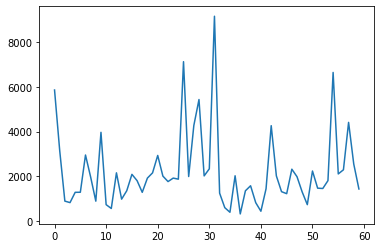

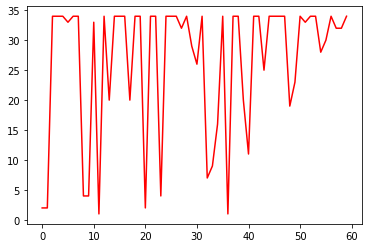

In [77]:
plt.plot(tmp.shop_id, tmp.item_cnt_month_avg)
plt.show()

plt.plot(tmp.shop_id, tmp.item_cnt_month_count, color='red')
plt.show()

We can see that some shops have a huge number of sales count in average, the variablity is high.

Also, the red plot shows that many shops have been running for many months, but there are some below 5 months... Should we do something about them? Flag as new, or short-lived...? 

It seems like one of the "new" shops has the highest average sales... Big temporal promotion? I need to take into account this big temporal differences. Let's see the proportion of total_sales/total_months_running

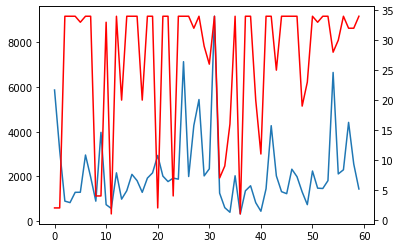

In [81]:
fig,ax = plt.subplots()
ax.plot(tmp.shop_id,tmp.item_cnt_month_total/tmp.item_cnt_month_count)
ax2=ax.twinx()
ax2.plot(tmp.shop_id, tmp.item_cnt_month_count, color='red')
plt.show()

Well, some of the shops with longest running times are the ones with highest ratio total_sales/total_months. But there are many with same number of months running, and varying ratio. And also there are shorter-lived shops with high ratios. It's tricky to consider these new shops, as there is no clear history for them, the current data might reflect opening sales/offers that will not sustain over time. The ratio total_sales/total_months might be related to location: not the same shop in big cities than small towns.